In [1]:
import pandas as pd
import numpy as np
from datetime import date

In [4]:
data = pd.DataFrame({'value':[2,-45,23,85,-28,-2,35,-12]})

In [5]:
data['Log+1'] = (data['value']+1).transform(np.log)

In [6]:
data['Log'] = (data['value']-data['value'].min()+1).transform(np.log)
data

,value,Log+1,Log
0,2,1.098612,3.871201
1,-45,NaN,0.000000
2,23,3.178054,4.234107
3,85,4.454347,4.875197
4,-28,NaN,2.890372
5,-2,NaN,3.784190
6,35,3.583519,4.394449
7,-12,NaN,3.526361


In [7]:
country = pd.DataFrame({'user':[1,2,3,1,1,2,2,3]})
country

,user
0,1
1,2
2,3
3,1
4,1
5,2
6,2
7,3


In [9]:
country['city']=['Roma','Madrid','Istanbul','Roma','Madrid','Istanbul','Madrid','Istanbul']
country

,user,city
0,1,Roma
1,2,Madrid
2,3,Istanbul
3,1,Roma
4,1,Madrid
5,2,Istanbul
6,2,Madrid
7,3,Istanbul


In [10]:
data['standardized'] = (data['value']-data['value'].mean())/data['value'].std()
data

,value,Log+1,Log,standardized
0,2,1.098612,3.871201,-0.129417
1,-45,NaN,0.000000,-1.288008
2,23,3.178054,4.234107,0.388251
3,85,4.454347,4.875197,1.916605
4,-28,NaN,2.890372,-0.868943
5,-2,NaN,3.784190,-0.228021
6,35,3.583519,4.394449,0.684062
7,-12,NaN,3.526361,-0.474529


In [31]:
from datetime import date

In [32]:
DATE = pd.DataFrame({'date':['01-01-2017','04-12-2008','23-06-1988','25-08-1999','20-02-1993']})

In [33]:
DATE['date'] = pd.to_datetime(DATE.date, format ="%d-%m-%Y")

In [34]:
DATE['year'] = DATE['date'].dt.year

In [35]:
DATE['month'] = DATE['date'].dt.month

In [36]:
DATE['passed_year'] = date.today().year-DATE['date'].dt.year

In [37]:
DATE['passed_month'] = (date.today().year-DATE['date'].dt.year)*12+date.today().month-DATE['date'].dt.month

In [38]:
DATE['day_name'] = DATE['date'].dt.day_name()
DATE

,date,year,month,passed_year,passed_month,day_name
0,2017-01-01,2017,1,5,60,Sunday
1,2008-12-04,2008,12,14,157,Thursday
2,1988-06-23,1988,6,34,403,Thursday
3,1999-08-25,1999,8,23,269,Wednesday
4,1993-02-20,1993,2,29,347,Saturday


In [40]:
Data = pd.read_csv('housing.csv')
Data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [44]:
Data = Data.loc[:, ["median_income", "latitude", "longitude"]]
Data['longitude'] = Data['longitude'] * -1

In [46]:
Data.describe()

,median_income,latitude,longitude
count,20640.000000,20640.000000,20640.000000
mean,3.870671,35.631861,119.569704
std,1.899822,2.135952,2.003532
min,0.499900,32.540000,114.310000
25%,2.563400,33.930000,118.010000
50%,3.534800,34.260000,118.490000
75%,4.743250,37.710000,121.800000
max,15.000100,41.950000,124.350000


In [48]:
#No null data -> data is already clean
#dropping outlier row with standard deviation
factor = 3
upper_lim_median = (Data['median_income'].mean()) + Data['median_income'].std() * factor
lower_lim_median = (Data['median_income'].mean()) - Data['median_income'].std() * factor

In [49]:
DAta = Data[(Data['median_income'] < upper_lim_median) & (Data['median_income'] > lower_lim_median)]

In [50]:
upper_lim_latitude = (Data['latitude'].mean()) + Data['latitude'].std() * factor
lower_lim_latitude = (Data['latitude'].mean()) - Data['latitude'].std() * factor
DAta = Data[(Data['latitude'] < upper_lim_latitude) & (Data['latitude'] > lower_lim_latitude)]

In [51]:
upper_lim_latitude = (Data['longitude'].mean()) + Data['longitude'].std() * factor
lower_lim_latitude = (Data['longitude'].mean()) - Data['longitude'].std() * factor
DAta = Data[(Data['longitude'] < upper_lim_latitude) & (Data['longitude'] > lower_lim_latitude)]

In [52]:
DAta

,median_income,latitude,longitude
0,8.3252,37.88,122.23
1,8.3014,37.86,122.22
2,7.2574,37.85,122.24
3,5.6431,37.85,122.25
4,3.8462,37.85,122.25
...,...,...,...
20635,1.5603,39.48,121.09
20636,2.5568,39.49,121.21
20637,1.7000,39.43,121.22
20638,1.8672,39.43,121.32


In [53]:
#Quartile
Data = pd.read_csv("housing.csv")
Data = Data.loc[:, ["median_income", "latitude", "longitude"]]
Data['longitude'] = Data['longitude'] * -1

In [54]:
upper_lim = Data['median_income'].quantile(.95)
lower_lim = Data['median_income'].quantile(.05)

DAta = Data[(Data['median_income'] < upper_lim) & (Data['median_income'] > lower_lim)]

In [55]:
#Log Transform
DAta.head(5)

,median_income,latitude,longitude
2,7.2574,37.85,122.24
3,5.6431,37.85,122.25
4,3.8462,37.85,122.25
5,4.0368,37.85,122.25
6,3.6591,37.84,122.25


In [56]:
import matplotlib.pyplot as plt

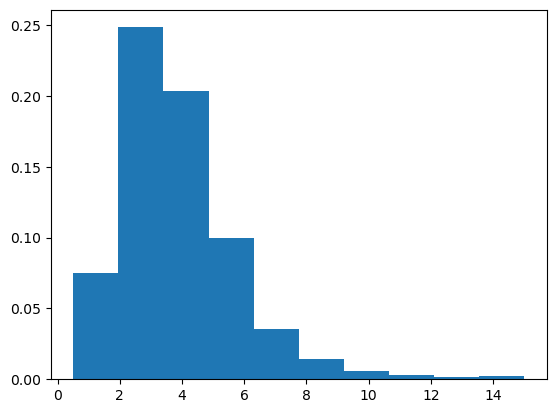

In [57]:
plt.hist(Data['median_income'],density = True)
plt.show()

In [75]:
label = ['Low', 'Moderate', 'High' ]
Data['Level']= pd.qcut(Data['median_income'], q=[0,0.3,0.6,1] ,labels = label)
Data

TypeError: unsupported operand type(s) for -: 'str' and 'str'